In [ ]:
import matplotlib.pyplot as plt
import numpy as np

: 

In [2]:
!wget http://skuld.cs.umass.edu/traces/mmsys/2013/pathbandwidth/bus.ljansbakken-oslo/report.2010-09-28_1407CEST.log
!wget https://skuld.cs.umass.edu/traces/mmsys/2013/pathbandwidth/bus.ljansbakken-oslo/report.2010-09-29_0852CEST.log
!wget https://skuld.cs.umass.edu/traces/mmsys/2013/pathbandwidth/bus.ljansbakken-oslo/report.2010-09-29_1622CEST.log

--2023-05-07 19:34:27--  http://skuld.cs.umass.edu/traces/mmsys/2013/pathbandwidth/bus.ljansbakken-oslo/report.2010-09-28_1407CEST.log
Resolving skuld.cs.umass.edu (skuld.cs.umass.edu)... 128.119.245.89
Connecting to skuld.cs.umass.edu (skuld.cs.umass.edu)|128.119.245.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22665 (22K) [text/plain]
Saving to: ‘report.2010-09-28_1407CEST.log’

report.2010-09-28_1 100%[===================>]  22.13K  --.-KB/s    in 0.08s   

2023-05-07 19:34:28 (294 KB/s) - ‘report.2010-09-28_1407CEST.log’ saved [22665/22665]

--2023-05-07 19:34:28--  https://skuld.cs.umass.edu/traces/mmsys/2013/pathbandwidth/bus.ljansbakken-oslo/report.2010-09-29_0852CEST.log
Resolving skuld.cs.umass.edu (skuld.cs.umass.edu)... 128.119.245.89
Connecting to skuld.cs.umass.edu (skuld.cs.umass.edu)|128.119.245.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66450 (65K) [text/plain]
Saving to: ‘report.2010-09-29_0852CEST.log’



In [3]:
files = ['1.log', '2.log', '3.log']

In [4]:
def traffic_plot(filename):
  data = []

  with open(filename, 'r') as file:
      for line in file:
          values = line.split()
          timestamp = int(values[0])
          value1 = int(values[1])
          x = float(values[2])
          y = float(values[3])
          bytes = int(values[4])
          elapsed = int(values[5])
          bandwidth = bytes/elapsed
          # Create a dictionary with the parsed values
          row = {'timestamp': timestamp, 'value1': value1, 'x': x, 'y': y, 'bytes': bytes, 'elapsed': elapsed, 'bandwidth': bandwidth}
          data.append(row)
          

      # Extract x and y data from the parsed data
      x = [row['timestamp'] for row in data]
      y = [row['bandwidth'] for row in data] 

      # Create a line plot of the data
      plt.plot(range(len(data)), y)

      # Add labels and title to the plot
      plt.xlabel('Time (s)')
      plt.ylabel('Bandwidth (Bps)')
      plt.title('Mobile HTTP Streaming Bandwidth')
      #plt.axis([0, TIMESTEPS, -40, 40])
      plt.xlim(0,400)
      # plt.ylim(-50,50)
      plt.savefig(filename+'_timeseries.jpg', dpi = 300)

      # Display the plot
      plt.show()
      plt.clf()


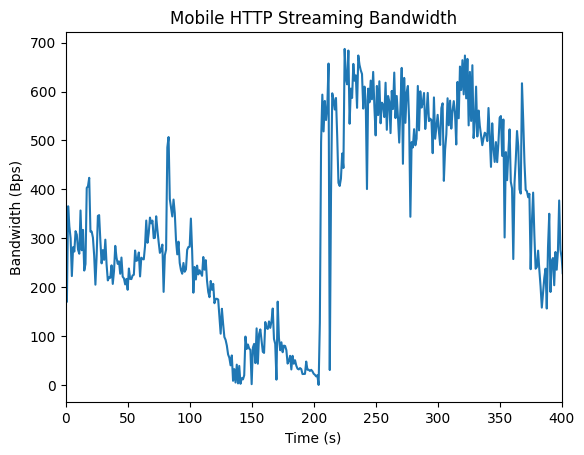

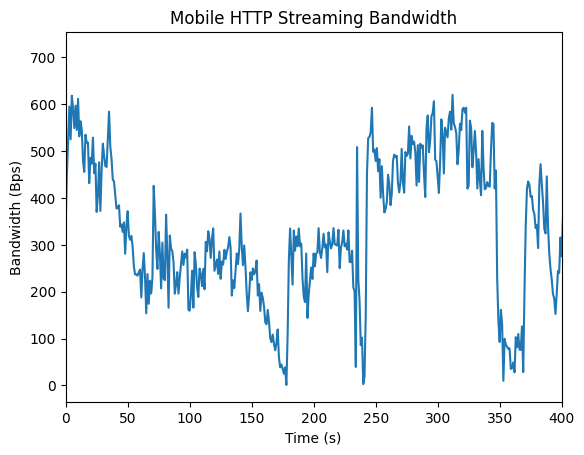

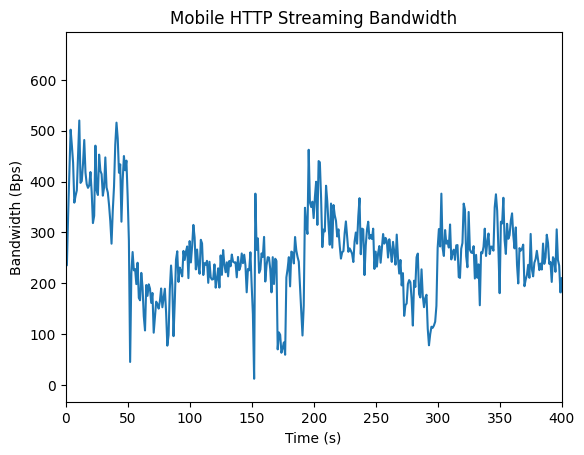

<Figure size 640x480 with 0 Axes>

In [5]:
traffic_plot('report.2010-09-28_1407CEST.log')
traffic_plot('report.2010-09-29_0852CEST.log')
traffic_plot('report.2010-09-29_1622CEST.log')

In [6]:
def data_extraction(filename):
  
  data = []
  with open(filename, 'r') as file:
      for line in file:
          values = line.split()
          timestamp = int(values[0])
          value1 = int(values[1])
          x = float(values[2])
          y = float(values[3])
          bytes = int(values[4])
          elapsed = int(values[5])
          bandwidth = bytes/elapsed
          # Create a dictionary with the parsed values
          row = {'timestamp': timestamp, 'value1': value1, 'x': x, 'y': y, 'bytes': bytes, 'elapsed': elapsed, 'bandwidth': bandwidth}
          data.append(row)
          
  return data

In [7]:
data = data_extraction('report.2010-09-28_1407CEST.log')
N = len(data)
data[0]

{'timestamp': 1285675666,
 'value1': 310761,
 'x': 59.889623,
 'y': 10.763866,
 'bytes': 288648,
 'elapsed': 1008,
 'bandwidth': 286.35714285714283}

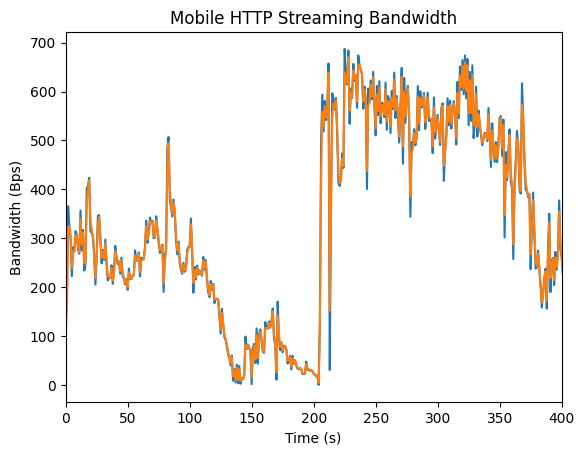

In [8]:
#Simulate the RW

#F(t) is actual traffic
#predict(t+1) = a*predict(t) + (1-a)*F(t)
a = 0.1
predict = np.zeros(N)
predict[0] = 100
a = 0.2
stride = 1
for i in range(1,N,stride):
  predict[i] = a * predict[i-stride] + (1-a) * data[i]['bandwidth']

y = [row['bandwidth'] for row in data] 
plt.xlabel('Time (s)')
plt.ylabel('Bandwidth (Bps)')
plt.title('Mobile HTTP Streaming Bandwidth')
plt.plot(range(len(data)), y, label = 'line 1')
plt.plot(range(len(data)), predict, label = 'line 2')
plt.xlim(0,400)
plt.savefig('approximation1407', dpi = 300)
# plt.ylim(90,400)

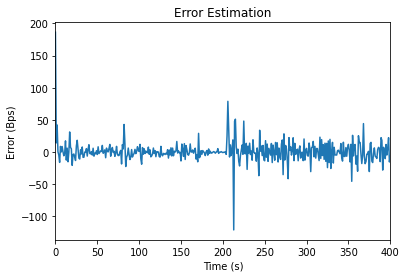

In [ ]:
plt.xlabel('Time (s)')
plt.ylabel('Error (Bps)')
plt.title('Error Estimation')
plt.plot(range(N), y-predict)
plt.xlim(0,400)

plt.savefig('error_line', dpi = 300)

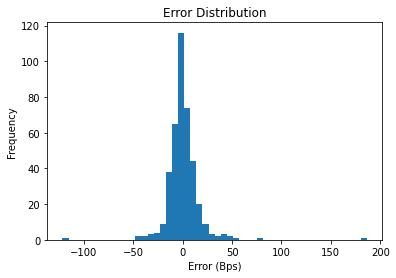

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random NumPy array
error = y-predict
error_dist = error[:400]
# Create a histogram
plt.hist(error_dist, bins=50)

# Add labels and title
plt.xlabel('Error (Bps)')
plt.ylabel('Frequency')
plt.title('Error Distribution')

# Show the plot

plt.savefig("error_distribution", dpi = 300)
plt.show()

In [17]:
#Tentative function drafts for developing
def bw_prediction(data, alpha = 0.1, stride = 1, initial_predict = 100):
  """
  Simulates a weighted smoothing solver to predict bandwidth based on observed data and generates a plot.

  Args:
      data: A list representing observed data. 
      alpha: A float representing the weight of the previous prediction in the current prediction.
      stride: An integer representing the number of steps between predictions, used to adapt different sampling frequency
  """
  N = len(data)
  predict = np.zeros(N)

  for i in range(1,N,stride):
    predict[i] = alpha * predict[i-stride] + (1-alpha) * data[i]

  return predict



In [11]:
len(data)

457

In [21]:
history_data = []
for i in range(len(data)):
  history_data.append(data[i]['bandwidth'])

In [18]:
prediction = bw_prediction(history_data)

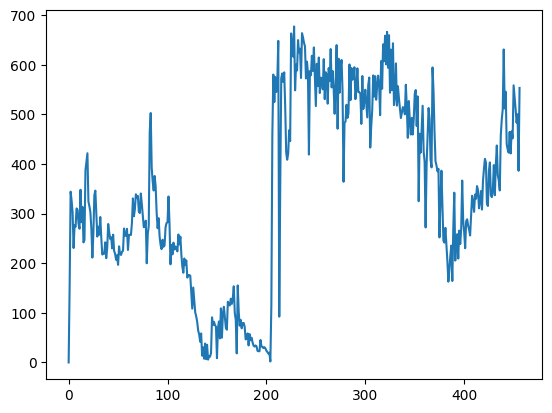

In [19]:
plt.plot(range(len(data)), prediction)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def bw_kalman_filter(data: List[float], Q: float = 1e-5, R: float = 0.1, initial_estimate: float = 100, initial_error: float = 1) -> np.ndarray:
    """
    Predicts the bandwidth using a Kalman filter based on the observed data.

    Args:
        data: A list representing observed data.
        Q: A float representing the process noise covariance.
        R: A float representing the measurement noise covariance.
        initial_estimate: A float representing the initial estimate of the bandwidth.
        initial_error: A float representing the initial error estimate.

    Returns:
        A numpy array of predicted bandwidth values.
    """
    N = len(data)
    kalman_gain = np.zeros(N)
    estimate = np.zeros(N)
    estimate[0] = initial_estimate
    error = np.zeros(N)
    error[0] = initial_error

    for i in range(1, N):
        # Predict step
        predicted_estimate = estimate[i-1]
        predicted_error = error[i-1] + Q

        # Update step
        kalman_gain[i] = predicted_error / (predicted_error + R)
        estimate[i] = predicted_estimate + kalman_gain[i] * (data[i] - predicted_estimate)
        error[i] = (1 - kalman_gain[i]) * predicted_error

    return estimate


In [22]:
est = bw_kalman_filter(history_data)

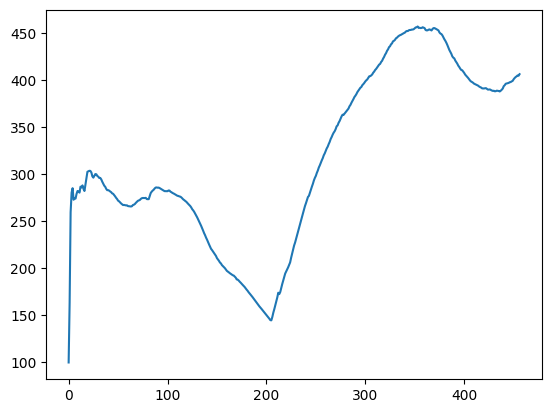

In [23]:
plt.plot(range(len(data)), est)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def bw_moving_average(data: List[float], window_size: int = 10) -> np.ndarray:
    """
    Predicts the bandwidth using a moving average based on the observed data.

    Args:
        data: A list representing observed data.
        window_size: An integer representing the size of the moving window.

    Returns:
        A numpy array of predicted bandwidth values.
    """
    N = len(data)
    predicted_bandwidth = np.zeros(N)

    for i in range(window_size-1, N):
        predicted_bandwidth[i] = np.mean(data[i-window_size+1:i+1])

    return predicted_bandwidth


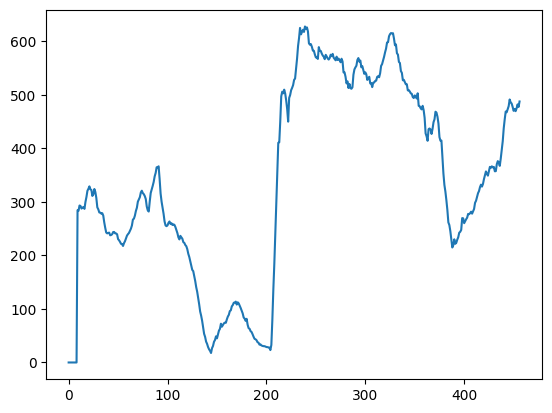

In [26]:
est_ma = bw_moving_average(history_data)
plt.plot(range(len(data)), est_ma)